In [87]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import svm
import itertools
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline #plt.show()사용 안해도 출력됨

UsageError: unrecognized arguments: #plt.show()사용 안해도 출력됨


In [88]:
lt=['a','b','c','d','e','f']
bl=[1,0,1,0,0,1]
dc=[0.1,0.7,0.4,0.4,0.5]
print(list(itertools.chain(lt,bl,dc)))
# print(list(izip[1,2,3],['a','b','c']))

['a', 'b', 'c', 'd', 'e', 'f', 1, 0, 1, 0, 0, 1, 0.1, 0.7, 0.4, 0.4, 0.5]


In [89]:
data = pd.read_csv("creditcard.csv")

In [90]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [91]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Text(0.5, 1.0, 'Scatter plot amount fraud')

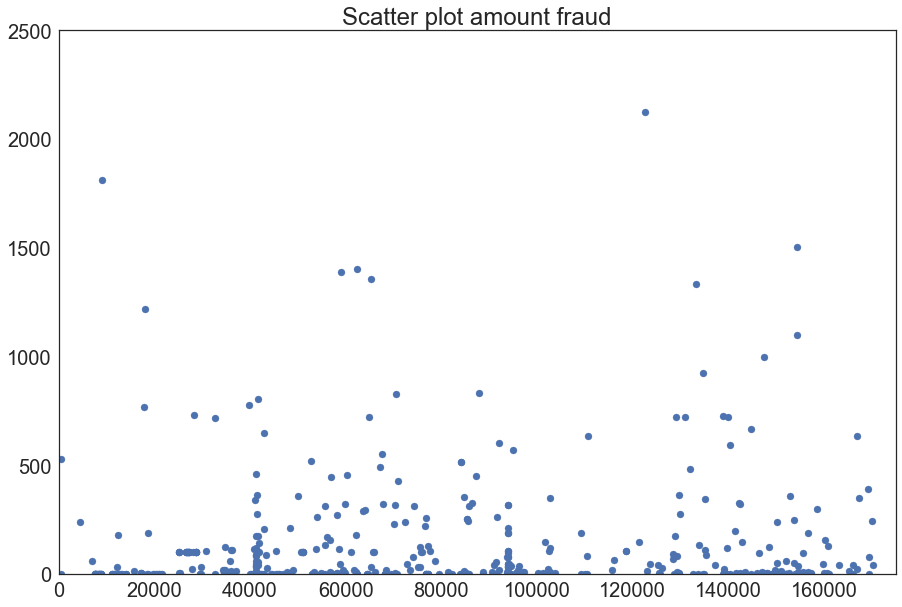

In [92]:
df_fraud = data[data['Class']==1] #부정사용
plt.figure(figsize=(15,10))
plt.scatter(df_fraud['Time'],df_fraud['Amount'])
plt.xlim([0,175000])
plt.ylim([0,2500])
plt.title('Scatter plot amount fraud')

In [93]:
nb_big_fraud=df_fraud[df_fraud['Amount']>1000]
nb_big_fraud.shape[0] #9건 부정 거래에 대한 각 금액이 1000을 넘어감

9

In [94]:
number_fraud=len(data[data.Class==1])
number_no_fraud=len(data[data.Class==0])
number_no_fraud

284315

In [95]:
(number_no_fraud-number_fraud)/number_no_fraud #99.82% 정상 거래

0.998269524998681

In [96]:
# 훈련 데이터 불균형(신용카드거래, 단백질구조 서열 규칙)
# => 표본추출(과소 표본 추출, 과잉 표본 추출)
# => knn 
# 오분류 비용 : 원본 데이터는 그래도 유지, 소수 범주(불법사용카드거래)에 가중치를 줘서 불균형 해소

In [97]:
data.corr

<bound method DataFrame.corr of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
5            2.0  -0.425966   0.960523  1.141109 -0.168252  0.420987   
6            4.0   1.229658   0.141004  0.045371  1.202613  0.191881   
7            7.0  -0.644269   1.417964  1.074380 -0.492199  0.948934   
8            7.0  -0.894286   0.286157 -0.113192 -0.271526  2.669599   
9            9.0  -0.338262   1.119593  1.044367 -0.222187  0.499361   
10          10.0   1.449044  -1.176339  0.913860 -1.375667 -1.971383   
11          10.0   0.384978   0.616109 -0.874300 -0.094019  2.924584   
12          10.0   1.249999  -1.

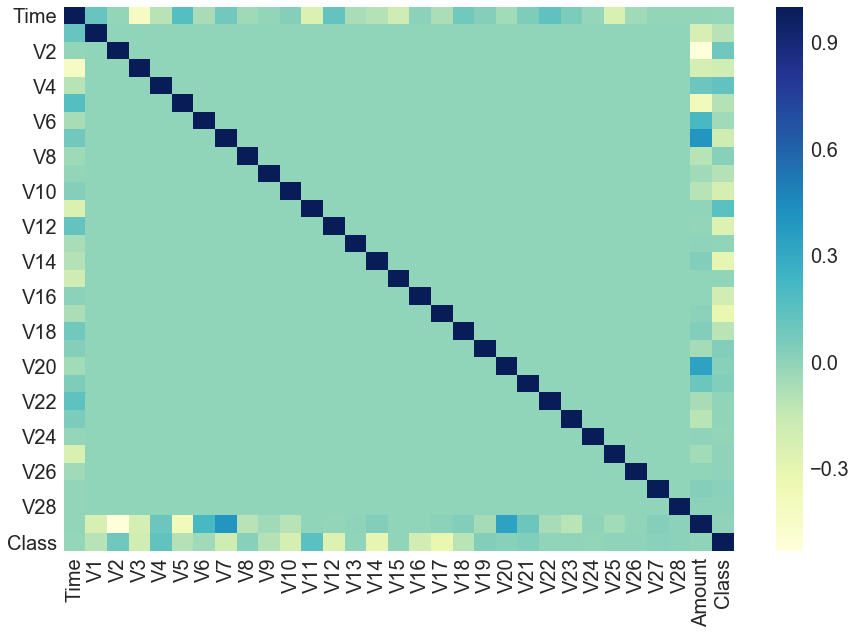

In [98]:
import seaborn as sns
df_corr=data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(df_corr, cmap="YlGnBu")
sns.set(font_scale=2, style='white')
plt.show()

#PCA가 수행되면 특징간 상관관계가 없다

In [99]:
rank=df_corr['Class']
df_rank=pd.DataFrame(rank)

In [100]:
import numpy as np
df_rank=np.abs(df_rank).sort_values(by='Class', ascending=False)

In [101]:
df_rank
df_rank.dropna(inplace=True)

In [102]:
# 데이터 셋 분리(트레이닝/테스트)
df_train_all=data[1:150000]
df_train_1=df_train_all[df_train_all['Class']==1] #15만개중 불법거래 데이터만 추출
df_train_0=df_train_all[df_train_all['Class']==0] #15만개중 불법거래 데이터만 추출
len(df_train_1) #15만건 중 293건이 비정상 거래
df_sample=df_train_0.sample(300)
df_train=df_train_1.append(df_sample)

In [103]:
df_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
6331,7526.0,0.008430,4.137837,-6.240697,6.675732,0.768307,-3.353060,-1.631735,0.154612,-2.795892,...,0.364514,-0.608057,-0.539528,0.128940,1.488481,0.507963,0.735822,0.513574,1.00,1
6334,7535.0,0.026779,4.132464,-6.560600,6.348557,1.329666,-2.513479,-1.689102,0.303253,-3.139409,...,0.370509,-0.576752,-0.669605,-0.759908,1.605056,0.540675,0.737040,0.496699,1.00,1
6336,7543.0,0.329594,3.712889,-5.775935,6.078266,1.667359,-2.420168,-0.812891,0.133080,-2.214311,...,0.156617,-0.652450,-0.551572,-0.716522,1.415717,0.555265,0.530507,0.404474,1.00,1
6338,7551.0,0.316459,3.809076,-5.615159,6.047445,1.554026,-2.651353,-0.746579,0.055586,-2.678679,...,0.208828,-0.511747,-0.583813,-0.219845,1.474753,0.491192,0.518868,0.402528,1.00,1
6427,7610.0,0.725646,2.300894,-5.329976,4.007683,-1.730411,-1.732193,-3.968593,1.063728,-0.486097,...,0.589669,0.109541,0.601045,-0.364700,-1.843078,0.351909,0.594550,0.099372,1.00,1


In [116]:
df_train=df_train.sample(frac=1) # 0.01%는 전체 행에서 1%를 임의(표본) 추출

In [117]:
df_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
92834,64128.0,-1.237798,1.122444,0.761214,-1.501441,-0.325387,-0.226341,-0.087262,0.751912,0.185467,...,-0.077781,-0.204306,0.052429,-0.295752,-0.206046,0.770091,0.270989,0.110033,3.78,0
48094,43494.0,-1.278138,0.716242,-1.143279,0.217805,-1.293890,-1.168952,-2.564182,0.204532,-1.611155,...,0.490183,0.470427,-0.126261,-0.126644,-0.661908,-0.349793,0.454851,0.137843,24.90,1
52443,45456.0,0.992650,-0.392196,1.190212,1.640623,-0.812231,0.889706,-0.710467,0.511721,1.222331,...,-0.368047,-0.744003,0.070113,-0.028295,0.335392,-0.523656,0.073318,0.019005,32.90,0
82095,59239.0,-0.221898,0.848922,1.502553,0.465405,0.424298,-0.953696,0.785917,-0.382561,-0.554437,...,-0.186959,-0.375190,0.033899,0.369820,-0.727644,0.056816,-0.027172,-0.043192,1.98,0
10738,18213.0,-1.295751,0.256755,3.906558,3.630741,-0.796698,1.611096,-0.815362,0.377266,2.045695,...,-0.090012,0.822735,0.041491,0.394634,0.112011,0.485431,-0.013914,0.001698,22.82,0
64329,51112.0,-9.848776,7.365546,-12.898538,4.273323,-7.611991,-3.427045,-8.350808,6.863604,-2.387567,...,0.931958,-0.874467,-0.192639,-0.035426,0.538665,-0.263934,1.134095,0.225973,99.99,1
42696,41203.0,-8.426814,6.241659,-9.946470,8.199614,-8.213093,-2.522046,-11.643028,5.339500,-7.051016,...,2.427460,0.692667,0.020305,0.499809,0.467594,0.483162,1.195671,0.198294,88.23,1
127215,78248.0,-0.981025,0.920879,2.409865,0.564890,0.248886,-0.251573,0.649909,-0.213116,-0.357464,...,0.244274,0.850205,-0.403663,0.438585,0.370455,-0.241324,-0.337874,-0.117114,7.80,0
9205,13203.0,-1.209111,-1.113532,1.356532,-1.335384,0.398265,-0.166348,0.147635,0.011429,0.477228,...,0.101930,0.311664,0.233598,-0.387006,0.099909,-0.356343,0.078197,-0.041873,156.78,0
46918,42988.0,-4.423508,1.648048,-6.934388,4.894601,-5.078131,0.010849,-3.409096,1.409291,-3.260672,...,0.698359,0.487478,1.228698,-0.535217,0.388278,-0.009466,2.300164,0.081231,648.00,1


In [118]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 593 entries, 92834 to 108754
Data columns (total 31 columns):
Time      593 non-null float64
V1        593 non-null float64
V2        593 non-null float64
V3        593 non-null float64
V4        593 non-null float64
V5        593 non-null float64
V6        593 non-null float64
V7        593 non-null float64
V8        593 non-null float64
V9        593 non-null float64
V10       593 non-null float64
V11       593 non-null float64
V12       593 non-null float64
V13       593 non-null float64
V14       593 non-null float64
V15       593 non-null float64
V16       593 non-null float64
V17       593 non-null float64
V18       593 non-null float64
V19       593 non-null float64
V20       593 non-null float64
V21       593 non-null float64
V22       593 non-null float64
V23       593 non-null float64
V24       593 non-null float64
V25       593 non-null float64
V26       593 non-null float64
V27       593 non-null float64
V28       593 non-nu

In [119]:
x_train=df_train.drop(['Time','Class'],axis=1)

In [120]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 593 entries, 92834 to 108754
Data columns (total 29 columns):
V1        593 non-null float64
V2        593 non-null float64
V3        593 non-null float64
V4        593 non-null float64
V5        593 non-null float64
V6        593 non-null float64
V7        593 non-null float64
V8        593 non-null float64
V9        593 non-null float64
V10       593 non-null float64
V11       593 non-null float64
V12       593 non-null float64
V13       593 non-null float64
V14       593 non-null float64
V15       593 non-null float64
V16       593 non-null float64
V17       593 non-null float64
V18       593 non-null float64
V19       593 non-null float64
V20       593 non-null float64
V21       593 non-null float64
V22       593 non-null float64
V23       593 non-null float64
V24       593 non-null float64
V25       593 non-null float64
V26       593 non-null float64
V27       593 non-null float64
V28       593 non-null float64
Amount    593 non-nu

In [121]:
y_train=df_train['Class'] #label

In [122]:
df_test_all=data[150000:]
x_test_all=df_test_all.drop(['Time','Class'],axis=1)
y_test_all=df_test_all['Class']

In [123]:
x_train_rank=df_rank.index[1:11]

In [124]:
x_test_all_rank=df_test_all[df_rank.index[1:11]]
x_test_all_rank

,V17,V14,V12,V10,V16,V3,V7,V11,V4,V18
150000,0.303587,1.419095,-2.023544,1.679491,0.036239,-2.271357,0.227831,-1.119050,-0.965729,-0.270763
150001,1.093413,1.043655,-2.261436,-0.547523,0.487402,-1.495139,-0.079727,2.037024,0.567020,0.551817
150002,2.223235,0.350683,-3.690932,-1.801060,0.193499,-0.285828,0.469643,-0.302412,-0.035038,0.812112
150003,0.279108,1.977388,-2.225046,-0.832737,0.448214,1.114803,-1.211008,1.251792,-0.355338,0.930716
150004,1.050133,0.325006,-2.306577,-0.859321,0.728211,-2.100796,-1.054428,1.261972,-0.112869,0.349466
150005,1.865824,-0.225782,-2.085373,-1.324580,0.030740,-1.750351,0.126285,0.506294,0.649678,0.373319
150006,0.130415,1.830993,-1.868770,-0.600288,0.065955,0.487797,0.789522,1.732706,-0.472012,0.040190
150007,0.637100,2.258827,-2.983877,-0.064568,-0.642396,-1.482632,0.477465,-0.318680,1.625679,-0.118497
150008,1.103791,0.378681,-2.096267,-0.595213,0.779595,0.407761,-0.189202,2.001268,-0.808079,1.109538
150009,0.226684,1.387461,-1.870418,-1.506683,-0.379792,1.170658,1.078773,-0.024573,-0.643297,-0.243767


In [130]:
class_names=np.array(['0','1']) #1:fraud, 0:no fraud
classifier=svm.SVC(kernel='linear')

In [131]:
classifier.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [133]:
prediction_SVM_all=classifier.predict(x_test_all)

In [134]:
prediction_SVM_all #예측

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [140]:
from sklearn import metrics

In [142]:
metrics.accuracy_score(y_test_all, prediction_SVM_all)

0.9597795366709444

In [144]:
rep=metrics.classification_report(y_test_all, prediction_SVM_all)
print(rep)

             precision    recall  f1-score   support

          0       1.00      0.96      0.98    134608
          1       0.03      0.91      0.06       199

avg / total       1.00      0.96      0.98    134807



In [147]:
confusion_matrix(y_test_all, prediction_SVM_all)

array([[129203,   5405],
       [    17,    182]], dtype=int64)

               예측
           0          1
실제 0([[129203,   5405],
     1  [    17,    182]]